In [1]:
from datasets import process_dataset

In [2]:
process_dataset(dataset = "ajgt")

In [3]:
from bayanat import Bayanat
data = Bayanat('datasets/ajgt/train_data.txt')
print(data.get_size_vocab())
print(data.get_number_of_words())

6453
11689


/home/zaid/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import numpy as np
max_word_tokens = int(np.mean([len(stmt.split(' ')) for stmt in data.data.split('\n')]))
max_char_tokens = int(np.mean([len(stmt) for stmt in data.data.split('\n')]))

print(max_word_tokens)
print(max_char_tokens)

9
46


In [5]:
from bayanat import Bayanat
data = Bayanat('datasets/ajgt/test_data.txt')
print(data.get_size_vocab())
print(data.get_number_of_words())

1101
1486


In [12]:
l = max_word_tokens
r = max_char_tokens
path = 'ckpts/ajgt/'

for v in [300, 500, 1000, 5000]:
    for j in range(0, 2):
        for i in range(0, 30):
            !python3 script.py --tok {j} --run {i} --vocab_size {v} --max_word_tokens {l} --max_char_tokens {r} --dir {path} --dataset ajgt
            raise('error')

/home/zaid/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zaid/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zaid/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zaid/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/zaid/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-93781af94697>", line 9, in <module>
    raise('error')
TypeError: exceptions must derive from BaseException

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zaid/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zaid/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/zaid/anaconda3/lib/pyt

TypeError: exceptions must derive from BaseException

In [11]:
import tensorflow as tf
tf.__version__

'1.15.0'

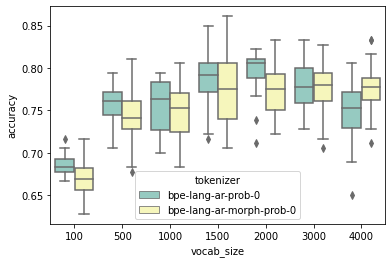

In [ ]:
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = []
path = '/content/drive/MyDrive/DISS/Tokenization/AJGTv2/ckpts/**/accuracies.json'

for path in glob.glob(path):
  start = path.find('vocab_size_')
  end = path.find('/accuracies.json')
  vocab_size = path[start+11:end]
  dd = json.load(open(path, mode='r'))
  for tokenizer in dd:
    results = dd[tokenizer]
    for val in results:
      data.append([vocab_size]+[tokenizer]+[float(val)])
df = pd.DataFrame(data, columns = ['vocab_size', 'tokenizer', 'accuracy'])
g = sns.boxplot(x="vocab_size", y="accuracy", hue="tokenizer",
                 data=df, palette="Set3")
# g.set(ylim=(0, 1))

In [ ]:
!cp script.py {path}'/script.py' 